Leung Wai Liu <br>
JPMC-SMM4H <br>
June 27, 2022 <br>
Task 1b Classification Tweets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1 = pd.read_csv('train/train_spans.tsv', sep='\t', names=['tweet_id', 'class', 'begin', 'end', 'span'])
df1

,tweet_id,class,begin,end,span
0,SMM4H2022yW4mXhmCE9gh1B7b,ADE,28,37,allergies
1,SMM4H2022afMxPjtHKyItF0n3,ADE,31,46,HURT YOUR Liver
2,SMM4H2022dc1lWHnZeBy441B8,ADE,48,50,AD
3,SMM4H2022dc1lWHnZeBy441B8,ADE,88,93,focus
4,SMM4H2022ExV2GXXaqhGjJNFM,ADE,11,15,died
5,SMM4H2022dZ7ZqyvGqxh0jKeH,ADE,40,44,died
6,SMM4H202221svYY3nNe8z5jdE,ADE,66,79,tendon damage
7,SMM4H2022TktK7f4NNPqLzVWl,ADE,26,32,dreams
8,SMM4H2022E8PLU8eznkYN0dlx,ADE,84,98,tendon rupture
9,SMM4H2022FxzK9r9cEII1gmaJ,ADE,101,111,withdrawal


In [4]:
df2 = pd.read_csv('train/train_tweets.tsv', sep='\t', names=["tweet_id", "tweet"])
df2

,tweet_id,tweet
0,SMM4H2022yW4mXhmCE9gh1B7b,"do you have any medication allergies? ""asthma!..."
1,SMM4H2022afMxPjtHKyItF0n3,"@USER_________ if #avelox has hurt your liver,..."
2,SMM4H2022dc1lWHnZeBy441B8,"apparently, baclofen greatly exacerbates the ""..."
3,SMM4H2022ExV2GXXaqhGjJNFM,pt of mine died from cipro rt @USER_________: ...
4,SMM4H2022dZ7ZqyvGqxh0jKeH,@USER_____ The only pt of mine who ever died w...
5,SMM4H202221svYY3nNe8z5jdE,owww. i hurt my foot. &amp; am concerned. 1st ...
6,SMM4H2022TktK7f4NNPqLzVWl,@USER______ oh robitussin dreams are notorious...
7,SMM4H2022E8PLU8eznkYN0dlx,#eds friends! anybody taken #cipro? (antibioti...
8,SMM4H2022FxzK9r9cEII1gmaJ,"@USER___________ Umm, are you being a smart-as..."
9,SMM4H20222QPvF36FzxCLJe8l,today i'm an emotional mess. that's what happe...


In [7]:
df = pd.merge(df1, df2, how="left", on="tweet_id")
df

,tweet_id,class,begin,end,span,tweet
0,SMM4H2022yW4mXhmCE9gh1B7b,ADE,28,37,allergies,"do you have any medication allergies? ""asthma!..."
1,SMM4H2022afMxPjtHKyItF0n3,ADE,31,46,HURT YOUR Liver,"@USER_________ if #avelox has hurt your liver,..."
2,SMM4H2022dc1lWHnZeBy441B8,ADE,48,50,AD,"apparently, baclofen greatly exacerbates the ""..."
3,SMM4H2022dc1lWHnZeBy441B8,ADE,88,93,focus,"apparently, baclofen greatly exacerbates the ""..."
4,SMM4H2022ExV2GXXaqhGjJNFM,ADE,11,15,died,pt of mine died from cipro rt @USER_________: ...
5,SMM4H2022dZ7ZqyvGqxh0jKeH,ADE,40,44,died,@USER_____ The only pt of mine who ever died w...
6,SMM4H202221svYY3nNe8z5jdE,ADE,66,79,tendon damage,owww. i hurt my foot. &amp; am concerned. 1st ...
7,SMM4H2022TktK7f4NNPqLzVWl,ADE,26,32,dreams,@USER______ oh robitussin dreams are notorious...
8,SMM4H2022E8PLU8eznkYN0dlx,ADE,84,98,tendon rupture,#eds friends! anybody taken #cipro? (antibioti...
9,SMM4H2022FxzK9r9cEII1gmaJ,ADE,101,111,withdrawal,"@USER___________ Umm, are you being a smart-as..."


In [6]:
df.to_csv('train.tsv', sep="\t", index=False)

In [18]:
!python3 -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [19]:
# Filtering the data
df['count'] = 1
overview = df.groupby(['label']).count()['count']
overview

label
ADE       1235
NoADE    16150
Name: count, dtype: int64

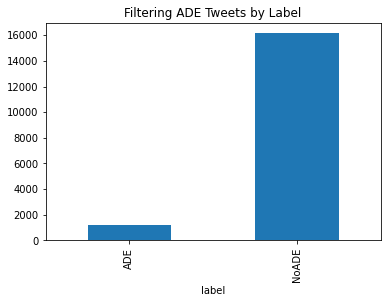

In [22]:
overview_show = df.groupby(['label']).count()['count'].plot(kind='bar')
plt.title("Filtering ADE Tweets by Label")
plt.show()

In [24]:
ade_tweets = df.loc[(df['label'] == 'ADE') & (df['tweet'] != 'NaN')]
ade_tweets

,tweet_id,label,tweet,count
9,SMM4H2022UsQOREUBkMZlbbta,ADE,seroquel aka wake up at 2:30 and waste half yo...,1
21,SMM4H202229Qm3Zb6sn6LMFMt,ADE,i have been on lorazepam / diazepam / quetiapi...,1
29,SMM4H2022GeW2mGArOLmn74V7,ADE,2/2 blood tests scheduled. BP normal Now have ...,1
61,SMM4H20229YdVV8DZjhjKPr0l,ADE,oh hello seroquel old friend i mi*passes out o...,1
64,SMM4H20221NX6sl37Vu6nYPi8,ADE,ooh me too! rt @USER____: #schizophrenia #sero...,1
...,...,...,...,...
17338,SMM4H2022ZigEFK8ZpZfG4GaD,ADE,vyvanse evidently doesn't care about my bed time,1
17354,SMM4H2022wJGNHJfJ0QyUCt2g,ADE,"@USER_____ yeah,it can be caused by swelling f...",1
17358,SMM4H2022tNWUy3yDn6QdXzrQ,ADE,"Depression hurts, cymbalta can help. Jk. Cymba...",1
17374,SMM4H2022dWRKt5ZNZcqhL3og,ADE,@USER________ and with seroquel i take half of...,1


In [27]:
ade_tweets_only = ade_tweets.tweet.tolist()

In [30]:
no_ade_tweets = df.loc[(df['label'] == 'NoADE') & (df['tweet'] != 'NaN')]
no_ade_tweets

,tweet_id,label,tweet,count
0,SMM4H2022qLUQBRHYD1Z3P0Bw,NoADE,knowledge is power!levaquin antibiotic interac...,1
1,SMM4H2022Y7dIrCNzlZ6OHWmY,NoADE,"methylpred, glatiramer acetate, interferon alp...",1
2,SMM4H2022YDKxa7o2NC3erEdl,NoADE,@USER______ @USER__________ // .... cymbalta c...,1
3,SMM4H2022qovo6eqwcAGzSMC1,NoADE,@USER______ I don't think Imodium works . Full...,1
4,SMM4H2022Bz5GaKU5KUEK9qDC,NoADE,"@USER________ Meanwhile, all I get is flavorle...",1
...,...,...,...,...
17379,SMM4H2022trTwCEDrhtZXZpIu,NoADE,Still lack of clarity on how to reverse the ef...,1
17381,SMM4H2022Qg9zwRG7ZyW5jHIW,NoADE,FYI: I've got sore eyes and I'm using this lev...,1
17382,SMM4H2022kHabuDoffcbnGUkw,NoADE,every time i take vyvanse to be productive i j...,1
17383,SMM4H20226s8AhGDrtJBYpcBF,NoADE,"Guess since I'm not retiring yet, then i don't...",1


In [31]:
no_ade_tweets_only = no_ade_tweets.tweet.tolist()

In [32]:
import spacy
from collections import Counter

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
nlp = spacy.load("en_core_web_lg")

In [40]:
# ADE Tweets first

ade_tweet_tokens = []

for tweet in ade_tweets_only:
    if type(tweet) is str: 
        doc = nlp(tweet)
        ade_tweet_tokens.append(doc)
    else: 
        print(tweet)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [41]:
len(ade_tweet_tokens)

1211